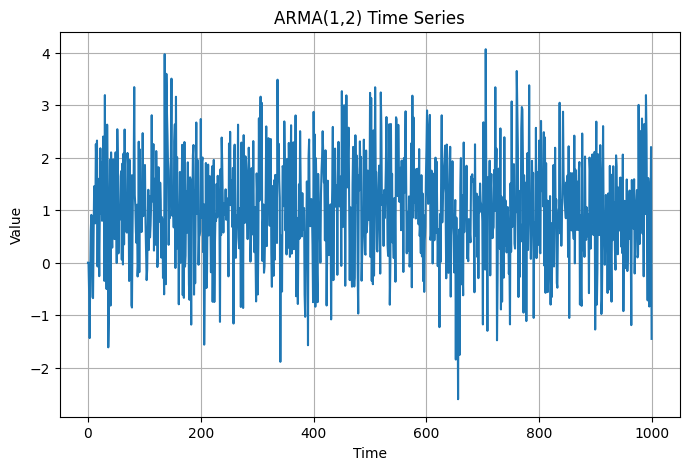

In [2]:
#1.
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# 定義 ARMA(1,2) 模型參數
phi = 0.7
theta1 = -0.8
theta2 = 0.1
n = 1000

# 生成白噪聲
noise = np.random.normal(size=n)

# 初始化時間序列
R = np.zeros(n)

# 生成 ARMA(1,2) 時間序列
for t in range(2, n):
    R[t] = 0.3 + phi * R[t-1] + noise[t] + theta1 * noise[t-1] + theta2 * noise[t-2]
    
plt.figure(figsize=(8, 5))
plt.plot(R)
plt.title('ARMA(1,2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [25]:
#2.
import numpy as np

# 定義 EACF 函數
def eacf(data, max_order_p, max_order_q):
    n = len(data)
    eacf_values = np.zeros((max_order_p, max_order_q))
    for p in range(1, max_order_p + 1):
        for q in range(1, max_order_q + 1):
            acf_pq = np.zeros(min(p, q))
            for j in range(min(p, q)):
                acf_pq[j] = np.corrcoef(data[j:n], data[:n-j])[0, 1]
            eacf_values[p - 1, q - 1] = np.sum(acf_pq**2) / min(p, q)
    return eacf_values

# 定義 EACF 訂單估計函數
def eacf_order(data, max_order_p, max_order_q):
    eacf_result = eacf(data, max_order_p, max_order_q)
    order_p, order_q = np.unravel_index(np.argmax(eacf_result), eacf_result.shape)
    return order_p + 1, order_q + 1

# 使用 EACF 估計訂單
max_order_p = 5
max_order_q = 5
estimated_order_p, estimated_order_q = eacf_order(R, max_order_p, max_order_q)
print("Estimated order using EACF (p, q):", estimated_order_p, estimated_order_q)

Estimated order using EACF (p, q): 1 1


In [27]:
#3.
# 使用 ARMA 模型進行參數估計
order_p, order_q = 1, 1  # 從上面得到的訂單
model = sm.tsa.ARIMA(R, order=(order_p, 0, order_q))  # 注意這裡沒有差分
fitted_model = model.fit()
   
# 打印模型的參數估計結果
print("Parameter estimation using ARIMA:")
print(fitted_model.summary())

#參數估計如結果

Parameter estimation using ARIMA:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1468.339
Date:                Fri, 26 Apr 2024   AIC                           2944.678
Time:                        17:00:04   BIC                           2964.309
Sample:                             0   HQIC                          2952.139
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9899      0.032     31.353      0.000       0.928       1.052
ar.L1         -0.5211      0.266     -1.960      0.050      -1.042    1.93e-05
ma.L1          0.4

In [1]:
# ARIMA 1.
import numpy as np
import statsmodels.api as sm

# 定義 ARMA(1,2) 模型參數
arparams_arma = np.array([0.7])  # AR參數
maparams_arma = np.array([-0.8, 0.1])  # MA參數

# 模擬 ARMA(1,2) 數據
arma_process = sm.tsa.ArmaProcess(arparams_arma, maparams_arma)
arma_data = arma_process.generate_sample(nsample=1000)

# 進行一階差分
diff_arma_data = np.diff(arma_data)

# 定義 ARIMA(1,1,2) 模型參數
arparams_arima = np.array([0.7])  # AR參數
maparams_arima = np.array([-0.8, 0.1])  # MA參數

# 模擬 ARIMA(1,1,2) 數據
arima_process = sm.tsa.ArmaProcess(arparams_arima, maparams_arima)
arima_diff_data = arima_process.generate_sample(nsample=1000)

# 將 ARIMA(1,1,2) 差分數據加回來以獲得完整數據
arima_data = np.cumsum(np.insert(arima_diff_data, 0, arma_data[0]))

# 打印數據點
print(arima_data)

[-1.36612351 -0.90950866 -1.91475012 ... 13.53329213 12.96722434
 12.66743017]


In [36]:
# ARIMA 2.
from statsmodels.tsa.stattools import adfuller

# 進行增廣Dickey-Fuller測試
adf_test_result = adfuller(arima_data)

# 提取ADF測試結果
adf_statistic = adf_test_result[0]
p_value = adf_test_result[1]
critical_values = adf_test_result[4]

# 打印測試結果
print("Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# 判斷測試結果
if p_value < 0.05:
    print("結果：拒絕虛無假設，數據具有顯著的穩定性")
else:
    print("結果：無法拒絕虛無假設，數據可能不穩定")

Augmented Dickey-Fuller Test:
ADF Statistic: -1.911067545315642
P-value: 0.3268726344549047
Critical Values:
   1%: -3.4369127451400474
   5%: -2.864437475834273
   10%: -2.568312754566378
結果：無法拒絕虛無假設，數據可能不穩定
